# Group Comparisons

## Reading Population Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mlb = pd.read_csv('mlb.csv')
print(mlb.head())
print(mlb.shape)

              name team       position  height  weight    age
0    Adam_Donachie  BAL        Catcher      74   180.0  22.99
1        Paul_Bako  BAL        Catcher      74   215.0  34.69
2  Ramon_Hernandez  BAL        Catcher      72   210.0  30.78
3     Kevin_Millar  BAL  First_Baseman      72   210.0  35.43
4      Chris_Gomez  BAL  First_Baseman      73   188.0  35.71
(1034, 6)


In [2]:
#obtaining summary statistics
mlb.describe()

,height,weight,age
count,1034.000000,1033.000000,1034.000000
mean,73.697292,201.689255,28.736712
std,2.305818,20.991491,4.320310
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.925000
75%,75.000000,215.000000,31.232500
max,83.000000,290.000000,48.520000


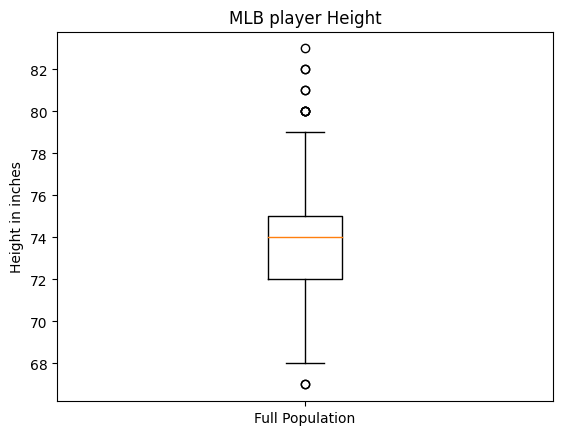

In [3]:
#creating a boxplot of heights
fig1, ax1 = plt.subplots()
ax1.boxplot(mlb['height'])
ax1.set_ylabel('Height in inches')
plt.title('MLB player Height')
plt.xticks([1], ["Full Population"])
plt.show()

In [4]:
#creating a random sample from the mlb dataset

sample1 = mlb.sample(n=30, random_state=8675309)
sample2 = mlb.sample(n=30, random_state=1729)
sample3 = [71]*30

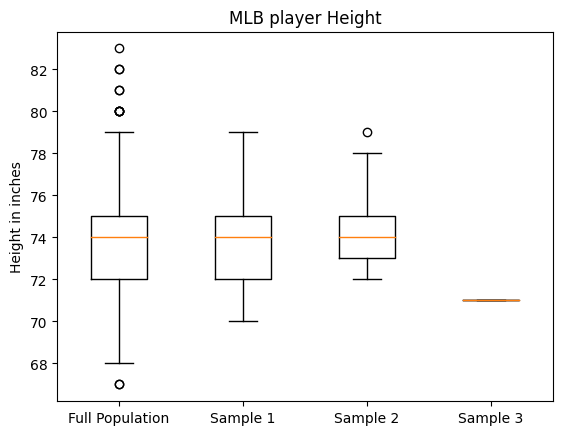

In [5]:
#creating a boxplot of mlb height and all the samples

fig1, ax1 = plt.subplots()
ax1.boxplot([mlb['height'], sample1['height'], sample2['height'], np.array(sample3)])
ax1.set_ylabel('Height in inches')
plt.title('MLB player Height')
plt.xticks([1, 2, 3, 4], ["Full Population", "Sample 1", "Sample 2", "Sample 3"])
plt.show()

In [6]:
#obtaining the mean from all the samples

print(np.mean(sample1['height']))
print(np.mean(sample2['height']))
print(np.mean(np.array(sample3)))

73.8
74.36666666666666
71.0


### Differences between sample data

In [7]:
# code to get a collection of 2000 sample means and their differences

alldifferences = []

for i in range(1000):
    newsample1 = mlb.sample(n=30, random_state=i*2)
    newsample2 = mlb.sample(n=30, random_state=i*2+1)
    alldifferences.append(np.mean(newsample1['height']) - np.mean(newsample2['height']))
print(alldifferences[:10])

[0.8333333333333286, -0.30000000000001137, -0.10000000000000853, -0.1666666666666572, 0.06666666666667709, -0.9666666666666686, 0.7999999999999972, 0.9333333333333371, -0.5333333333333314, -0.20000000000000284]


<ipython-input-8-24c671663834>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(alldifferences).set_title('Differences between of Sample means')


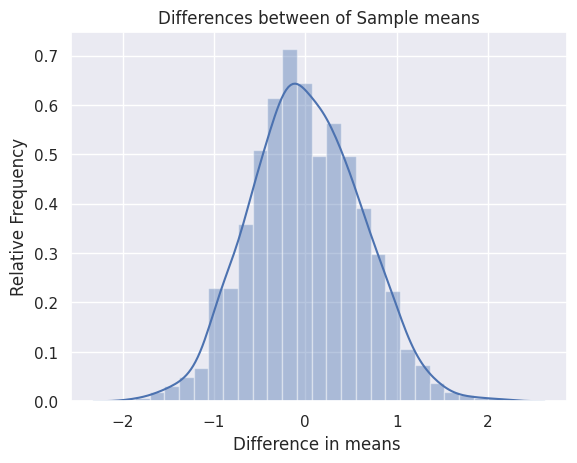

In [8]:
#plotting a dist plot of alldifferences

sns.set()

ax = sns.distplot(alldifferences).set_title('Differences between of Sample means')
plt.xlabel('Difference in means ')
plt.ylabel('Relative Frequency')
plt.show()



## The t-Test

In [9]:
#performing a t test to see if sample1 height and sample2 height come from the same population

from scipy import stats

stats.ttest_ind(sample1['height'], sample2['height'])

TtestResult(statistic=-1.0839563860213952, pvalue=0.2828695892305152, df=58.0)

In [11]:
# high p-value means the 2 samples are from the same population



In [12]:
#performing the Mann-Whitney U test on sample1 height and sample2 height

stats.mannwhitneyu(sample1['height'], sample2['height'])

MannwhitneyuResult(statistic=392.0, pvalue=0.38913738408151577)

## Comparing Groups in a Practical Context

In [13]:
#determining if desktop subs have different characteristics than laptop subs

In [14]:
# reading in the laptop and desktop datasets

desktop = pd.read_csv('desktop.csv')
laptop = pd.read_csv('laptop.csv')

In [15]:
print(desktop.head())
print(laptop.head())


   userid  spending  age  visits
0       1      1250   31     126
1       2       900   27       5
2       3         0   30     459
3       4      2890   22      18
4       5      1460   38      20
   userid  spending  age  visits
0      31      1499   32      12
1      32       799   23      40
2      33      1200   45      22
3      34         0   59     126
4      35      1350   17      85


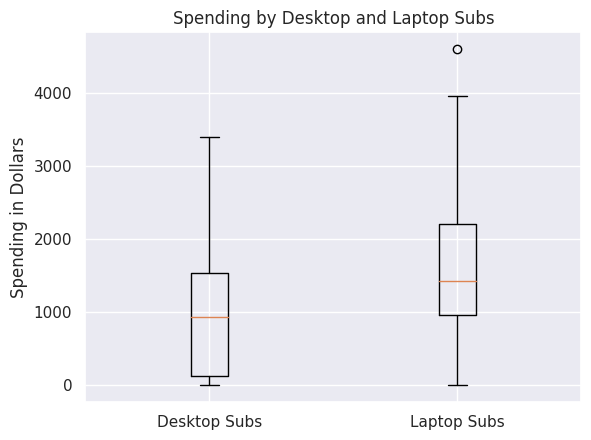

In [16]:
#Creating a boxplot of desktop spending vs laptop spending

fig1, ax1 = plt.subplots()
ax1.set_title("Spending by Desktop and Laptop Subs")
ax1.boxplot([desktop['spending'].values, laptop['spending'].values])
ax1.set_ylabel('Spending in Dollars')
plt.xticks([1, 2], ["Desktop Subs", "Laptop Subs"])
plt.show()

In [17]:
#getting descriptive stats from each dataset

print(desktop.describe())
print(laptop.describe())

          userid     spending        age       visits
count  30.000000    30.000000  30.000000    30.000000
mean   15.500000  1028.666667  35.766667   210.800000
std     8.803408   907.411032  15.199100   311.468203
min     1.000000     0.000000  14.000000     5.000000
25%     8.250000   127.500000  25.500000    46.750000
50%    15.500000   925.000000  32.000000   100.000000
75%    22.750000  1528.250000  44.250000   145.000000
max    30.000000  3400.000000  79.000000  1256.000000
          userid     spending        age       visits
count  30.000000    30.000000  30.000000    30.000000
mean   45.500000  1624.566667  38.733333   193.900000
std     8.803408  1252.884222  17.104009   323.071611
min    31.000000     0.000000  16.000000     6.000000
25%    38.250000   957.500000  25.000000    39.250000
50%    45.500000  1419.500000  33.000000    77.500000
75%    52.750000  2199.750000  49.750000   126.000000
max    60.000000  4600.000000  79.000000  1250.000000


In [19]:
#performing the t test on desktop spending and laptop spending

stats.ttest_ind(desktop['spending'], laptop['spending'])


TtestResult(statistic=-2.109853741030508, pvalue=0.03919630411621095, df=58.0)

In [20]:
# our p-value of 0.04 is low enough (our significance level was 5) to reject the null hypothesis that these are from the same group
#It appears that desktop and laptop email subs are at least slightlu different in a dectectable way